# Simple Neural Network to check CDC data

In [ ]:
import io
from google.colab import files
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
uploaded = files.upload()

Saving complete_df.csv.zip to complete_df.csv.zip


In [ ]:
!ls

complete_df.csv.zip  drive  sample_data


In [ ]:
!unzip complete_df.csv.zip

Archive:  complete_df.csv.zip
  inflating: complete_df.csv         
  inflating: __MACOSX/._complete_df.csv  


In [ ]:
df = pd.read_csv('complete_df.csv')

In [ ]:
df.head()

,date,County,County only,FIPS code,State,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,stringency_index,government_response_index,containment_health_index,economic_support_index,c1_school_closing,c1_flag,c2_workplace_closing,c2_flag,c3_cancel_public_events,c3_flag,c4_restrictions_on_gatherings,c4_flag,c5_close_public_transport,c5_flag,c6_stay_at_home_requirements,c6_flag,c7_movementrestrictions,c7_flag,c8_internationaltravel,e1_income_support,e1_flag,e2_debtrelief,h1_public_information_campaigns,h1_flag,h2_testing_policy,h3_contact_tracing,h6_facial_coverings,h6_flag,h7_vaccination_policy,...,% ventilators in use by COVID-19 patient - absolute change,% hospital CCNs reporting any utilization data at least once - last 7 days,% hospital CCNs reporting all utilization data at least once - last 7 days,% hospital CCNs ever reporting utilization data,% hospital CCNs reporting COVID-19 admissions at least once - last 7 days,People who are fully vaccinated as % of total population,People who are fully vaccinated as % of population - ages 65+,% Uninsured,% In Poverty,% Over Age 65,Average household size,% Non-Hispanic Black,% Hispanic,% Non-Hispanic Native American / Alaskan Native,% Non-Hispanic Asian,SVI score,CCVI score,Forecasted case trajectory,Viral (RT-PCR) lab test positivity rate - absolute change (may be an underestimate due to delayed reporting).1,Total RT-PCR diagnostic tests - % change (may be an underestimate due to delayed reporting).1,Testing latency - absolute change.1,% tests resulted in 3 or fewer days - absolute change.1,Viral (RT-PCR) lab test positivity rate - 15-21 days ago (may be an underestimate due to delayed reporting),% tests resulted in 3 or fewer days - 15-21 days ago,% Native American / Alaskan Native,% Asian,ihe_plus_5000_fte_cat,rapid_riser_cat,forecast_case_traj_cat,area_of_concern_cat,cases_national_total_change,total_full_vac_%_change,age_65_full_vac_%_change,com_trans_last7_cat,cbsa_type_cat,county_type_cat,Lat,Long_,daily_deaths,daily_confirmed_cases
0,2021-01-02,"Abbeville County, SC",Abbeville County,45001,South Carolina,-17.0,-10.0,-11.0,-1.0,-18.0,8.0,49.07,55.36,57.92,37.5,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116205,0.225468,0.22355,2.51,0.274228,0.01639,0.0,0.0,0.8564,0.698504,Uncertain,0.027,0.06,0.0,0.01,0.072,0.94,0.0,0.003629,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,34.223334,-82.461707,25,1282
1,2021-01-03,"Abbeville County, SC",Abbeville County,45001,South Carolina,-13.0,-8.0,0.0,17.0,-21.0,6.0,49.07,55.36,57.92,37.5,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116205,0.225468,0.22355,2.51,0.274228,0.01639,0.0,0.0,0.8564,0.698504,Uncertain,-0.007,0.34,0.0,0.01,0.097,0.94,0.0,0.003629,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,34.223334,-82.461707,26,1294
2,2021-01-04,"Abbeville County, SC",Abbeville County,45001,South Carolina,-8.0,-1.0,-9.0,-10.0,-17.0,7.0,49.07,55.36,57.92,37.5,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116205,0.225468,0.22355,2.51,0.274228,0.01639,0.0,0.0,0.8564,0.698504,Uncertain,-0.021,0.01,0.0,-0.01,0.106,0.96,0.0,0.003629,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,34.223334,-82.461707,26,1301
3,2021-01-05,"Abbeville County, SC",Abbeville County,45001,South Carolina,-10.0,-2.0,-15.0,-10.0,-15.0,6.0,49.07,55.36,57.92,37.5,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116205,0.225468,0.22355,2.51,0.274228,0.01639,0.0,0.0,0.8564,0.698504,Uncertain,-0.010,-0.16,1.0,-0.18,0.101,0.96,0.0,0.003629,0.0,0.0,

In [ ]:
drop_columns=['month','date','County','County only','FIPS code','State','Forecasted case trajectory','County type','CBSA type', 'State Abbreviation', 'Area of Concern Category',
              'Community Transmission Level - last 7 days','Community Transmission Level - previous 7 days','Rapid Riser Category', 'forecast_case_traj_cat']

In [ ]:
X = df.drop(columns=drop_columns)

In [ ]:
y = df['forecast_case_traj_cat']

In [ ]:
from sklearn.preprocessing import StandardScaler   # RECOMMENDED - neural networks need scaling
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score,\
 plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score,\
 mean_squared_error, balanced_accuracy_score, r2_score

In [ ]:
rand_state = 42

In [ ]:
X.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,stringency_index,government_response_index,containment_health_index,economic_support_index,c1_school_closing,c1_flag,c2_workplace_closing,c2_flag,c3_cancel_public_events,c3_flag,c4_restrictions_on_gatherings,c4_flag,c5_close_public_transport,c5_flag,c6_stay_at_home_requirements,c6_flag,c7_movementrestrictions,c7_flag,c8_internationaltravel,e1_income_support,e1_flag,e2_debtrelief,h1_public_information_campaigns,h1_flag,h2_testing_policy,h3_contact_tracing,h6_facial_coverings,h6_flag,h7_vaccination_policy,h7_flag,h8_protection_of_elderly_people,h8_flag,labor_force,employed,...,% staffed adult ICU beds occupied by COVID-19 patient - absolute change,% ventilators in use - absolute change,% ventilators in use by COVID-19 patient - absolute change,% hospital CCNs reporting any utilization data at least once - last 7 days,% hospital CCNs reporting all utilization data at least once - last 7 days,% hospital CCNs ever reporting utilization data,% hospital CCNs reporting COVID-19 admissions at least once - last 7 days,People who are fully vaccinated as % of total population,People who are fully vaccinated as % of population - ages 65+,% Uninsured,% In Poverty,% Over Age 65,Average household size,% Non-Hispanic Black,% Hispanic,% Non-Hispanic Native American / Alaskan Native,% Non-Hispanic Asian,SVI score,CCVI score,Viral (RT-PCR) lab test positivity rate - absolute change (may be an underestimate due to delayed reporting).1,Total RT-PCR diagnostic tests - % change (may be an underestimate due to delayed reporting).1,Testing latency - absolute change.1,% tests resulted in 3 or fewer days - absolute change.1,Viral (RT-PCR) lab test positivity rate - 15-21 days ago (may be an underestimate due to delayed reporting),% tests resulted in 3 or fewer days - 15-21 days ago,% Native American / Alaskan Native,% Asian,ihe_plus_5000_fte_cat,rapid_riser_cat,area_of_concern_cat,cases_national_total_change,total_full_vac_%_change,age_65_full_vac_%_change,com_trans_last7_cat,cbsa_type_cat,county_type_cat,Lat,Long_,daily_deaths,daily_confirmed_cases
0,-17.0,-10.0,-11.0,-1.0,-18.0,8.0,49.07,55.36,57.92,37.5,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0,3.0,0.0,2.0,1.0,2.0,1.0,9957.0,9397.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116205,0.225468,0.22355,2.51,0.274228,0.01639,0.0,0.0,0.8564,0.698504,0.027,0.06,0.0,0.01,0.072,0.94,0.0,0.003629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,34.223334,-82.461707,25,1282
1,-13.0,-8.0,0.0,17.0,-21.0,6.0,49.07,55.36,57.92,37.5,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0,3.0,0.0,2.0,1.0,2.0,1.0,9957.0,9397.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116205,0.225468,0.22355,2.51,0.274228,0.01639,0.0,0.0,0.8564,0.698504,-0.007,0.34,0.0,0.01,0.097,0.94,0.0,0.003629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,34.223334,-82.461707,26,1294
2,-8.0,-1.0,-9.0,-10.0,-17.0,7.0,49.07,55.36,57.92,37.5,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0,3.0,0.0,2.0,1.0,2.0,1.0,9957.0,9397.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116205,0.225468,0.22355,2.51,0.274228,0.01639,0.0,0.0,0.8564,0.698504,-0.021,0.01,0.0,-0.01,0.106,0.96,0.0,0.003629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,34.223334,-82.461707,26,1301
3,-10.0,-2.0,-15.0,-10.0,-15.0,6.0,49.07,55.36,57.92,37.5,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0,3.0,0.0,2.0,1.0,2.0,1.0,9957.0,9397.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116205,0.225468,0.22355,2.51,0.274228,0.01639,0.0,0.0,0.8564,0.698504,-0.010,-0.16,1.0,-0.18,0.101,0.96,0.0,0.003629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,34.223334,-82.461707,26,1305
4,-14.0,-7.0,-21.0,-15.0,-17.0,7.0,49.07,55.36,57.92,37.5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= rand_state)

In [ ]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)


In [ ]:
X.shape

(342478, 113)

In [ ]:
y_train = utils.to_categorical(y_train, 3) # 10 is for the number of different categories
y_test = utils.to_categorical(y_test, 3)

In [ ]:
# topology - shape of our network
model = Sequential()
model.add(Dense(113, input_shape=(113,),
               activation='relu'))
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50, batch_size=512)

Epoch 1/50
502/502 [==============================] - 2s 4ms/step - loss: 0.2114 - accuracy: 0.9140 - val_loss: 0.2431 - val_accuracy: 0.9033
Epoch 2/50
502/502 [==============================] - 2s 4ms/step - loss: 0.2110 - accuracy: 0.9140 - val_loss: 0.2412 - val_accuracy: 0.9041
Epoch 3/50
502/502 [==============================] - 2s 4ms/step - loss: 0.2095 - accuracy: 0.9151 - val_loss: 0.2414 - val_accuracy: 0.9037
Epoch 4/50
502/502 [==============================] - 2s 4ms/step - loss: 0.2084 - accuracy: 0.9153 - val_loss: 0.2397 - val_accuracy: 0.9048
Epoch 5/50
502/502 [==============================] - 2s 4ms/step - loss: 0.2081 - accuracy: 0.9154 - val_loss: 0.2380 - val_accuracy: 0.9059
Epoch 6/50
502/502 [==============================] - 2s 4ms/step - loss: 0.2073 - accuracy: 0.9158 - val_loss: 0.2372 - val_accuracy: 0.9061
Epoch 7/50
502/502 [==============================] - 2s 4ms/step - loss: 0.2063 - accuracy: 0.9160 - val_loss: 0.2392 - val_accuracy: 0.9041
Epoch 

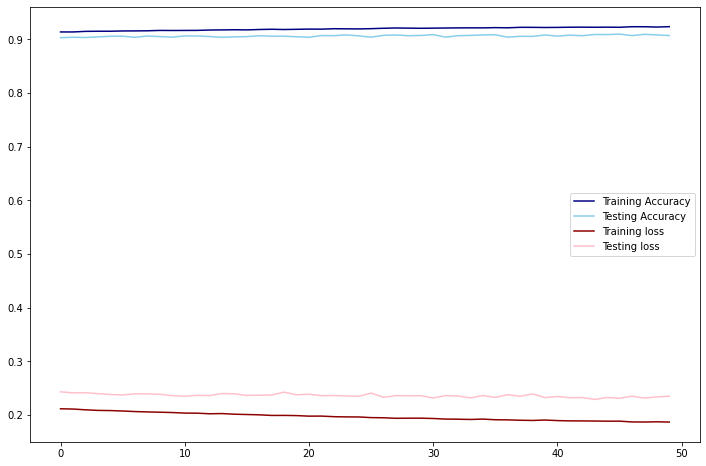

In [ ]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='Training Accuracy', color='navy')
plt.plot(test_accuracy, label='Testing Accuracy', color='skyblue')
plt.plot(train_loss, label='Training loss', color='darkred')
plt.plot(test_loss, label='Testing loss', color='pink')
plt.legend()

In [ ]:
accuracy_score(model.predict(X_test_sc).round(0),y_test)

0.8991240364400841

In [ ]:
pd.DataFrame(model.predict(X_test_sc).round(0)).value_counts()

0    1    2  
0.0  1.0  0.0    81001
1.0  0.0  0.0     4616
0.0  0.0  0.0        3
dtype: int64